In [1]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import pandas as pd
import scipy as sp
import numpy as np
import calendar

In [2]:
si = pd.read_excel("/home/jovyan/work/data/Climat.xlsx", sheet_name=1)

In [3]:
## Définition de plusieurs fonctions réutilisées par la suite

# Définition d'une fonctions permettant de récupérer la prochaine valeur existante
def getNextCorrectValue(df, rowIndex, columnIndex):
    nextValue = df.iloc[(rowIndex + 1), columnIndex]
    if np.isnan(nextValue):
        return getNextCorrectValue(df, rowIndex+2, columnIndex)
    else:
        return nextValue

# Définition d'une fonctions permettant de récupérer la précédente valeur existante
def getPreviousCorrectValue(df, rowIndex, columnIndex):
    nextValue = df.iloc[(rowIndex-1), columnIndex]
    if np.isnan(nextValue):
        return getNextCorrectValue(df, rowIndex-2, columnIndex)
    else:
        return nextValue

# Définition d'une fonction permettant de calculer la moyenne par tableau de nombre
def getAveragePerArray(arrayOfArray):
    average_per_array=[]

    # Calcul de la moyenne par mois

    for index in range(len(arrayOfArray)):
        average_per_array.append(np.average(arrayOfArray[index]))
    
    return average_per_array

# Définition d'une fonction permettant de calculer l'écart type par tableau de nombre
def getStandardDeviationPerArray(arrayOfArray):
    standard_deviation_per_array=[]
    
    # Calcul de l'écart type de température par mois
    
    for index in range(len(arrayOfArray)):
        standard_deviation_per_array.append(np.std(arrayOfArray[index]))
        
    return standard_deviation_per_array

In [4]:
temperature=[]

## Récupération des températures depuis l'excel

for column in range(3, 15):
    month_temperature=[]
    for row in range(3, 34):
        temperature_value = si.iloc[row, column]
        
        # Si le type de la température n'est pas cohérent alors on fait la moyenne 
        # de la température précédente et suivante ayant au moins une valeur correcte
        if(type(temperature_value) is str):
            temperature_value = np.average([getNextCorrectValue(si, row, column), getPreviousCorrectValue(si, row, column)])
            temperature_value = int(np.average([si.iloc[row - 1, column], si.iloc[row + 1, column]]))

        # Si la valeur n'est pas nulle (pour un mois plus court comme février)
        # alors on ne prend pas cette valeur en compte
        if(not np.isnan((temperature_value))):
            month_temperature.append(temperature_value)

    temperature.append(month_temperature)

In [5]:
# On calcul l'écart type par mois via la fonction définie plus tôt
temperature_average_per_month = getAveragePerArray(temperature)

# On calcul l'écart type par mois via la fonction définie plus tôt
temperature_standard_deviation_per_month = getStandardDeviationPerArray(temperature)

In [6]:
# Maintenant que nous avons calculé un premier jet de nos moyennes et de nos écarts-types, 
# nous allons les utiliser pour trouver les nombres "atypiques". Ces nombres seront ensuite
# remplacés par la moyenne de la valeur précédente et suivante dans le tableau.

for month in range(len(temperature)):
    # On considère qu'une valeur est fausse si elle n'est pas dans l'intervalle 
    # [(moyenne - multiplier * écart type du mois) ; (moyenne + multiplier * écart type du mois)]
    multiplier = 3
    min_interval = temperature_average_per_month[month] - multiplier * temperature_standard_deviation_per_month[month]
    max_interval = temperature_average_per_month[month] + multiplier * temperature_standard_deviation_per_month[month]
    
    for day_of_month in range(len(temperature[month])):
        temperature_of_day = temperature[month][day_of_month]
        if temperature_of_day < min_interval or temperature_of_day > max_interval:
            
            # On calcul la nouvelle valeur qui est la moyenne de la suivante et de la précédente
            new_temperature = int(np.average([temperature[month][day_of_month - 1], temperature[month][day_of_month + 1]]))
            temperature[month][day_of_month] = new_temperature

In [7]:
# On calcul à nouveau la moyenne par mois via la fonction définie plus tôt AVEC les nouvelles données
temperature_average_per_month = getAveragePerArray(temperature)

# On affiche la moyenne par mois
for month in range(len(temperature_average_per_month)):
    print("Month {!s} average temperature {!s}".format(calendar.month_name[month + 1], temperature_average_per_month[month]))

Month January average temperature -8.64516129032258
Month February average temperature -4.928571428571429
Month March average temperature 1.2258064516129032
Month April average temperature 8.0
Month May average temperature 12.903225806451612
Month June average temperature 17.0
Month July average temperature 18.322580645161292
Month August average temperature 17.806451612903224
Month September average temperature 10.5
Month October average temperature 3.806451612903226
Month November average temperature -0.3333333333333333
Month December average temperature -7.129032258064516


In [8]:
# On calcul à nouveau l'écart-type par mois via la fonction définie plus tôt AVEC les nouvelles données
temperature_standard_deviation_per_month = getStandardDeviationPerArray(temperature)

# On affiche l'écart-type par mois
for month in range(len(temperature_standard_deviation_per_month)):
    print("Month {!s} standard deviation temperature {!s}".format(calendar.month_name[month + 1], temperature_standard_deviation_per_month[month]))


# On constate une forte variation entre l'écart type du mois de Janvier pour ces valeurs en comparaison
# au valeurs pour le SI sans modification

Month January standard deviation temperature 3.6856162184184758
Month February standard deviation temperature 4.479545348650044
Month March standard deviation temperature 3.47070391130652
Month April standard deviation temperature 3.0983866769659336
Month May standard deviation temperature 3.970494717771346
Month June standard deviation temperature 2.988868236194653
Month July standard deviation temperature 3.5139087396506374
Month August standard deviation temperature 2.669050270120981
Month September standard deviation temperature 2.29128784747792
Month October standard deviation temperature 1.7674358105551902
Month November standard deviation temperature 3.654525352977532
Month December standard deviation temperature 1.8963791557031056


In [9]:
temperature_min_per_month=[]
temperature_max_per_month=[]

min_temp = temperature[0][0]
max_temp = temperature[0][0]

# Détermination du minimum et maximum de la température par mois et de l'année

for month in range(len(temperature)):
    temperature_min = min(temperature[month])
    temperature_max = max(temperature[month])
    temperature_min_per_month.append(temperature_min)
    temperature_max_per_month.append(temperature_max)
    if temperature_min < min_temp:
        min_temp = temperature_min
    if temperature_max > max_temp:
        max_temp = temperature_max
    print("{!s} min temp {!s} and max temp {!s}".format(calendar.month_name[month + 1], temperature_min, temperature_max))

print("Min temp {!s} and max temp {!s}".format(min_temp, max_temp))

January min temp -19 and max temp -3
February min temp -12 and max temp 5
March min temp -8 and max temp 7
April min temp 2 and max temp 16
May min temp 5 and max temp 18
June min temp 11 and max temp 22
July min temp 13 and max temp 26
August min temp 14 and max temp 26
September min temp 6 and max temp 16
October min temp 1 and max temp 7
November min temp -8 and max temp 5
December min temp -11 and max temp -3
Min temp -19 and max temp 26


<IPython.core.display.Javascript object>


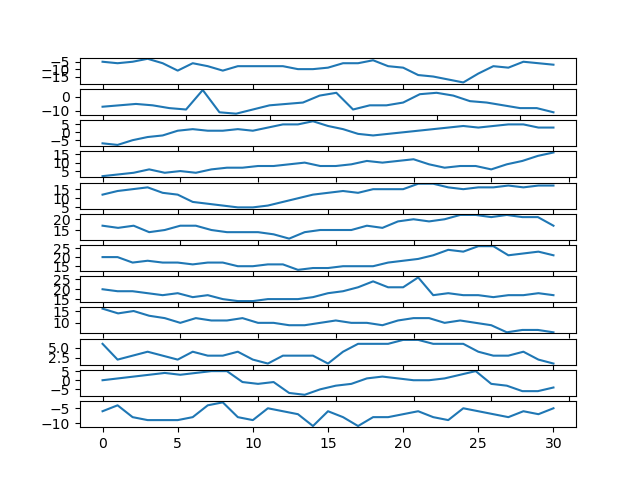

In [10]:
# Affichages de la température par mois via 1 figure

%matplotlib notebook

fig, axs = plt.subplots(12)

for month in range(len(temperature)):
    axs[month].plot(temperature[month])
    plt.show()

<IPython.core.display.Javascript object>


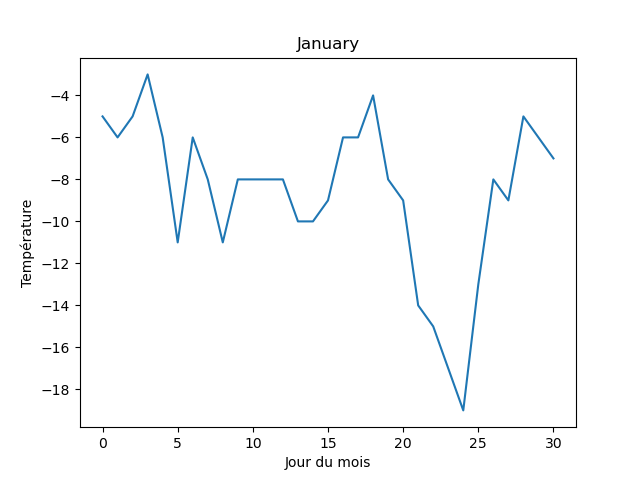

<IPython.core.display.Javascript object>


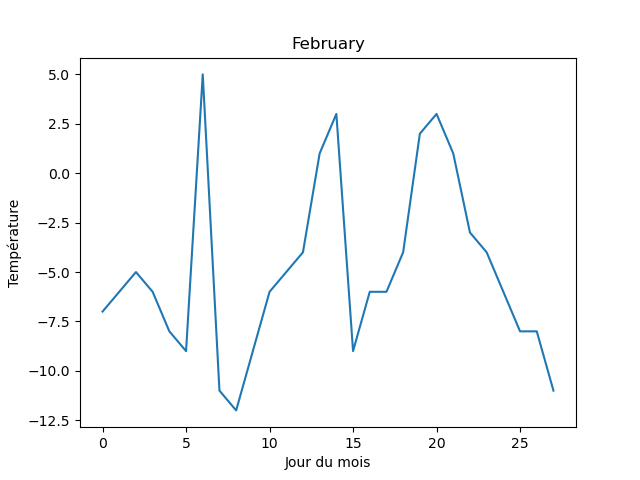

<IPython.core.display.Javascript object>


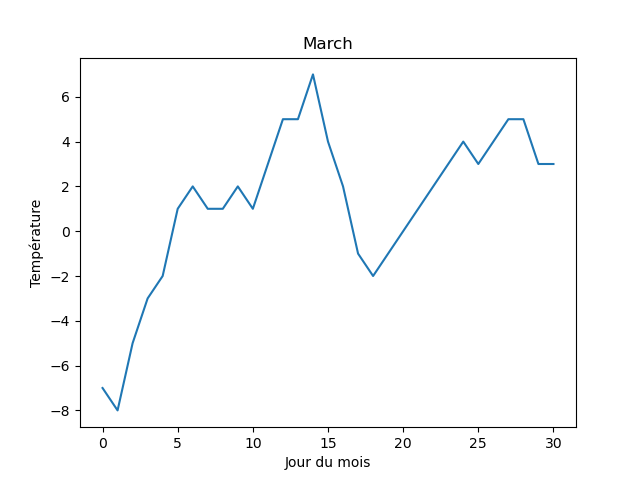

<IPython.core.display.Javascript object>


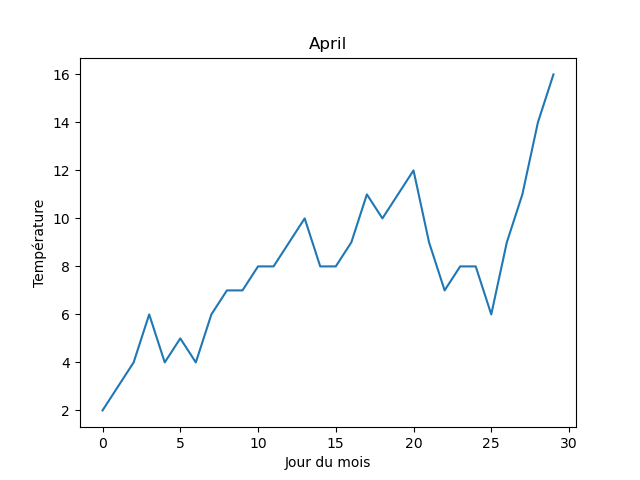

<IPython.core.display.Javascript object>


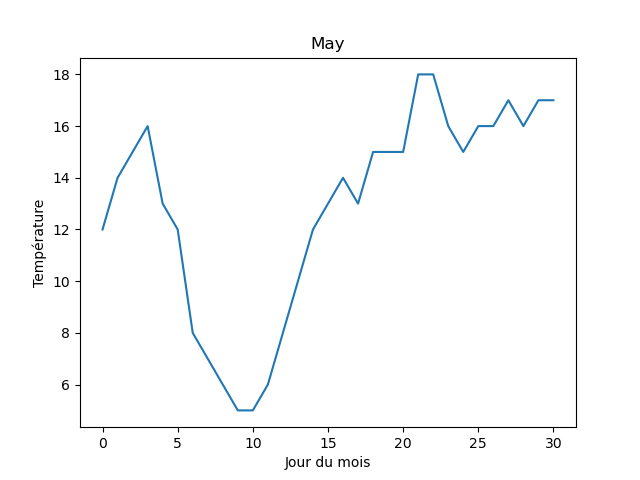

<IPython.core.display.Javascript object>


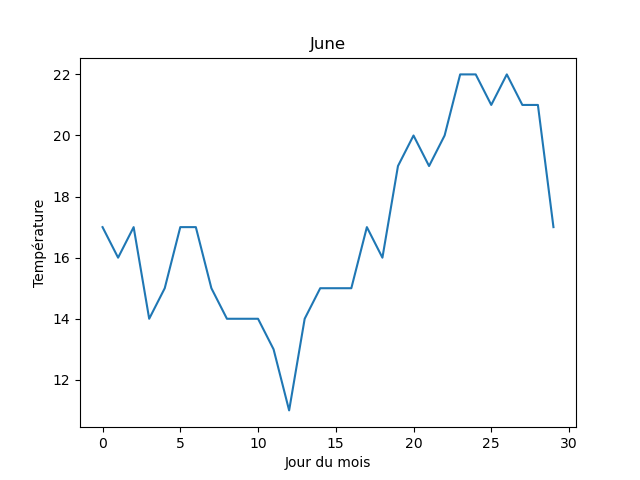

<IPython.core.display.Javascript object>


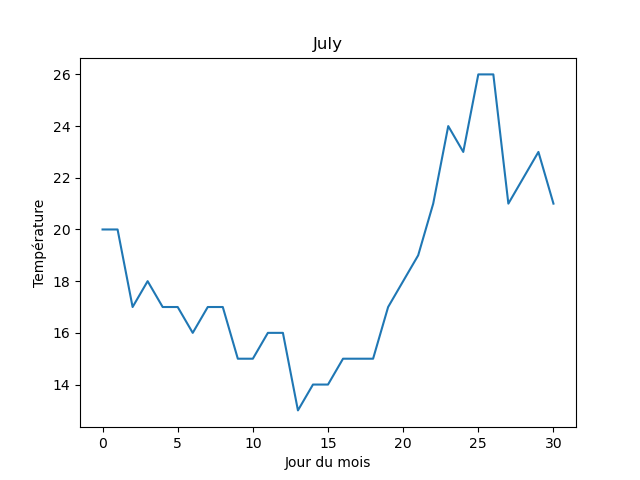

<IPython.core.display.Javascript object>


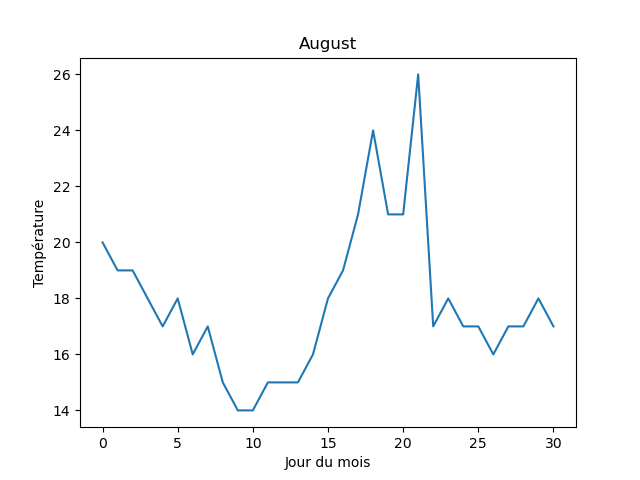

<IPython.core.display.Javascript object>


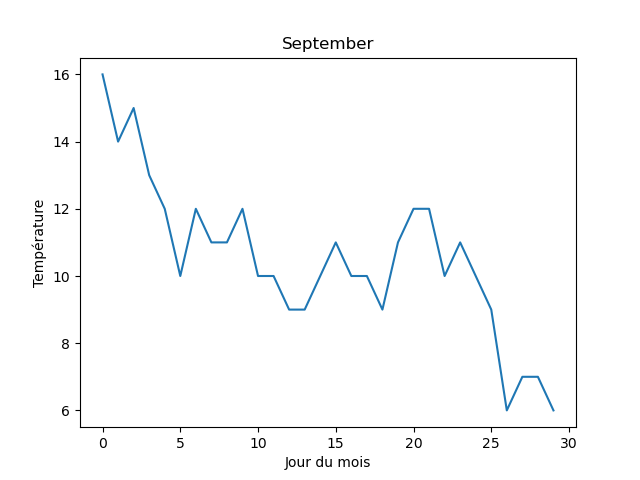

<IPython.core.display.Javascript object>


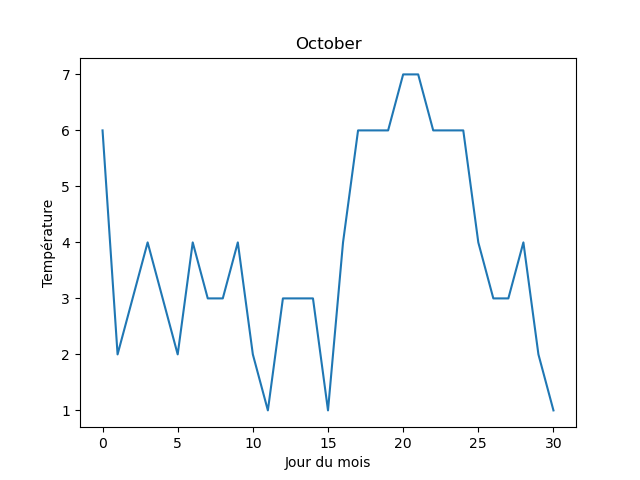

<IPython.core.display.Javascript object>


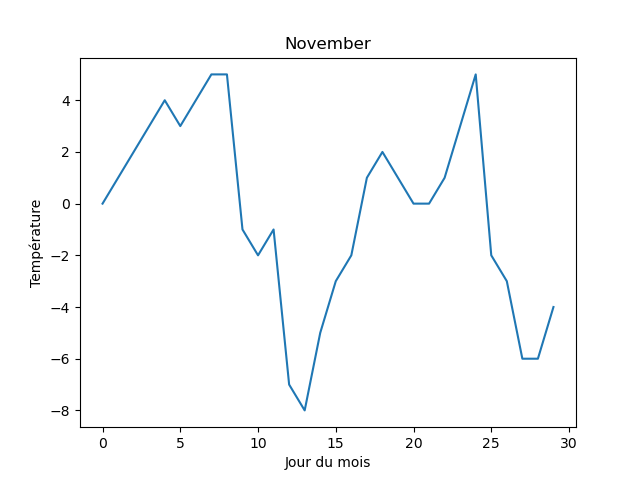

<IPython.core.display.Javascript object>


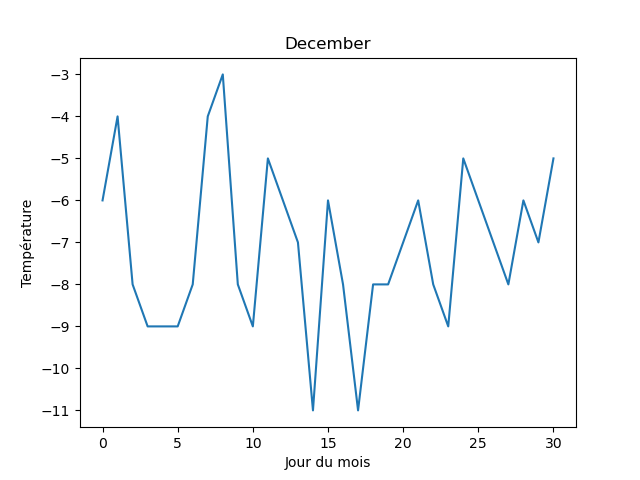

In [11]:
# Affichages de la température par mois via 12 figures

%matplotlib notebook

for month in range(len(temperature)):
    plot = plt.figure(month)
    plt.title(calendar.month_name[month + 1])
    plt.plot(temperature[month])
    plt.xlabel("Jour du mois")
    plt.ylabel("Température")

plt.show()

<IPython.core.display.Javascript object>


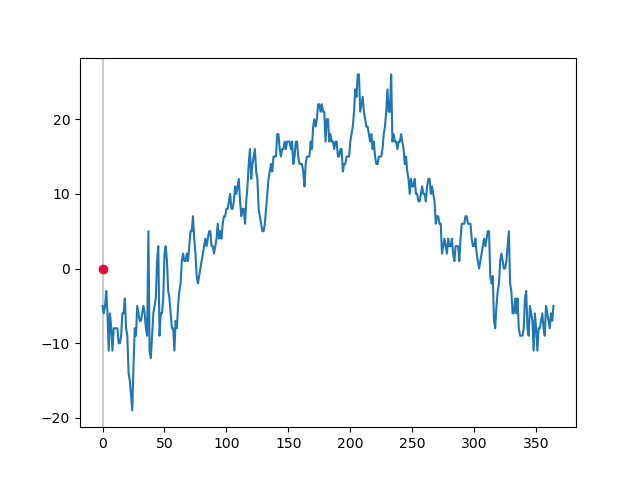

In [12]:
%matplotlib notebook

# Mise à plat
flatten = lambda t: [item for sublist in t for item in sublist]

class SnaptoCursor(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.txt = ax.text(0.7, 0.9, '')

    def mouse_move(self, event):
        if not event.inaxes: return
        x, y = event.xdata, event.ydata
        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        self.ly.set_xdata(x)
        self.marker.set_data([x],[y])
        self.txt.set_text('%1.2f°C (day %1d)' % (y, x))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()

t = np.arange(0, 365, 1)
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, t, flatten(temperature))
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, flatten(temperature),)
plt.show()

<IPython.core.display.Javascript object>


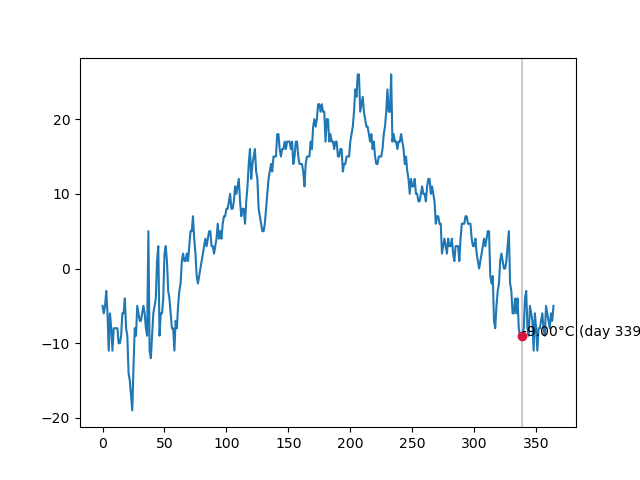

In [13]:
%matplotlib notebook

t = np.arange(0, 365, 1)
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, t, flatten(temperature))
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, flatten(temperature),)  
plt.show()